In [10]:
import pandas as pd
fp = "../data/coffee_prices_index.csv"
df = pd.read_csv(fp)

In [17]:
df.columns = ["date", "cindex"]
df["date"] = pd.to_datetime(df.date)
df["cindex"] = df["cindex"].astype(float).round(3)

In [18]:
%matplotlib inline
import statsmodels.api as sm

## Observations
1. Coffee prices for mild arabica do have patterns in price
2. Cycles of price increases have occured in the past. In the plot below, the first cycle starts around 2016, ends mid 2019, the second one ends in the third quarter of 2023. In general, there is an increasing trend in coffee prices. The pattern definitely has stochastic components as the auto-correlation plot confirms.

Text(0.5, 1.0, 'Price of mild arabica coffee')

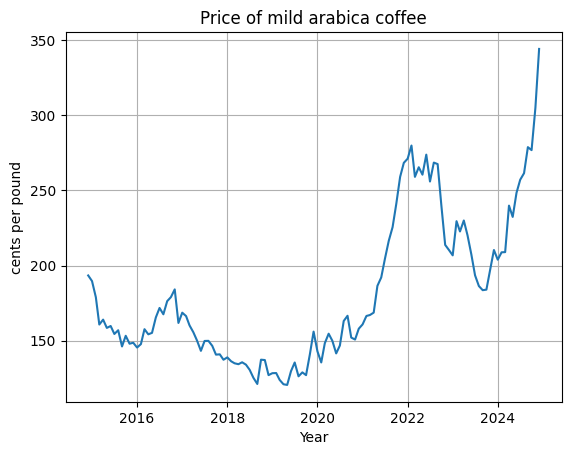

In [19]:
import matplotlib.pyplot as plt
plt.plot(df.date,df.cindex)
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("cents per pound")
plt.title ("Price of mild arabica coffee") # from https://fred.stlouisfed.org/series/PCOFFOTMUSDM
#plt.xlabel(df["date"])

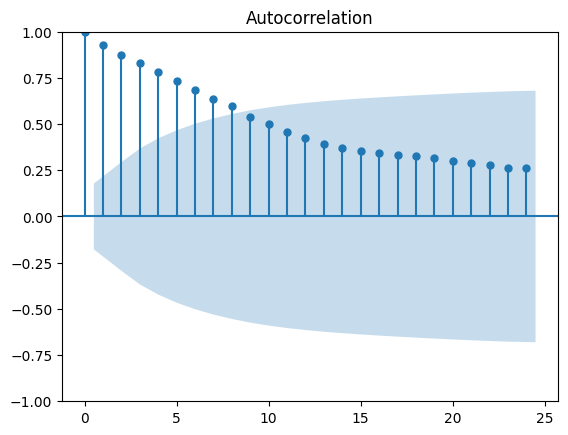

In [20]:
sm.graphics.tsa.plot_acf(df.cindex, lags=24);

In [21]:
coffee_prices = pd.Series(df.cindex.values, index=df.date)

In [22]:
coffee_prices

date
2014-12-01    193.386
2015-01-01    189.626
2015-02-01    178.888
2015-03-01    160.736
2015-04-01    163.998
               ...   
2024-08-01    261.438
2024-09-01    278.760
2024-10-01    276.777
2024-11-01    304.953
2024-12-01    344.119
Length: 121, dtype: float64

## Observations
Post-covid, there has been a stronger trend and larger seasonal variations. We have been experiencing this at the grocery stores and every where else. It looks like pre-covid, though prices did have trend-cycles and seasonality, they were gradual and similar. I am not economist, so I don't know the answers. The point here is that the right data tools can surface the problems that need analysis. It also provides a basis for determing the right characteristics we need to account for in downstream analysis like forecasting. Building predictive models without rigorous data analysis to document evidence for sources of variation we need to account for is like carpet bombing or driving blind. You are either using too much of computational sophistication, or, if you get a reasonable answer, you are just lucky that you picked a model that had the right features.

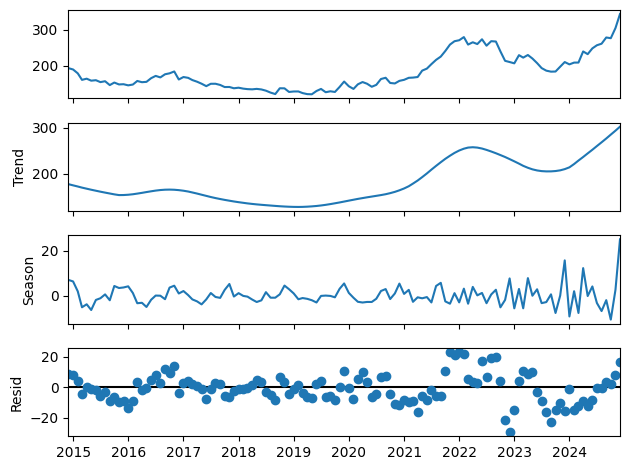

In [25]:
from statsmodels.tsa.seasonal import STL

stl = STL(coffee_prices, period=12)
res = stl.fit()
fig = res.plot()


## Errors Post Decomposition

<Axes: >

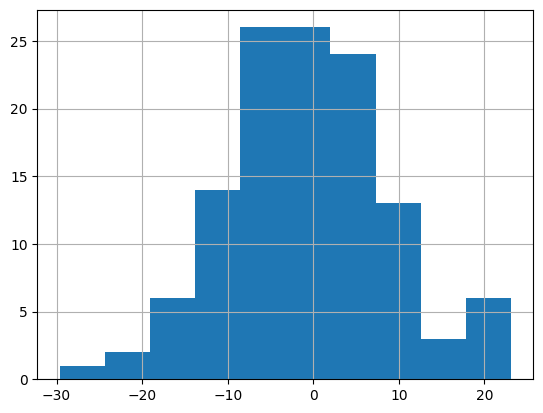

In [28]:
res.resid.hist() # looks reasonable